In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA,KernelPCA
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import missingno as mn
import fancyimpute
from sklearn.preprocessing import Imputer,StandardScaler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score,accuracy_score,confusion_matrix

Using TensorFlow backend.


In [2]:
loan_train=pd.read_csv('C:\\Users\\aayus\\Downloads\\train_u6lujuX_CVtuZ9i.csv')

In [3]:
loan_test=pd.read_csv('C:\\Users\\aayus\\Downloads\\test_Y3wMUE5_7gLdaTN.csv')

In [4]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
loan_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [9]:
loan_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
loan_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [11]:
loan_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
loan_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [14]:
loan_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [15]:
loan_train_dum=loan_train.drop(['Loan_ID'],axis=1)

In [16]:
loan_train_dum['Gender'].fillna('Male',inplace=True)

In [17]:
loan_train_dum['Dependents'].fillna('0',inplace=True)

In [18]:
loan_train_dum['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
loan_train_dum['Credit_History'].fillna(1,inplace=True)

In [20]:
loan_train_dum['Married'].fillna('Yes',inplace=True)

In [21]:
loan_train_dum['Self_Employed'].fillna('No',inplace=True)

In [22]:
loan_train_dum.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
loan_train_dum=pd.get_dummies(loan_train_dum,drop_first=True)

In [24]:
loan_train_dum.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [25]:
loan_train_dum.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,614.000000,614.000000,592.000000,600.00000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.855049,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.352339,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
loan_train_dum[loan_train_dum['Loan_Amount_Term'].isnull()]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
19,2600,3500.0,115.0,NaN,1.0,1,1,0,0,0,0,0,0,1,1
36,1828,1330.0,100.0,NaN,0.0,1,1,0,0,0,0,0,0,1,0
44,4695,0.0,96.0,NaN,1.0,1,1,0,0,0,1,1,0,1,1
45,3410,0.0,88.0,NaN,1.0,0,0,0,0,0,0,0,0,1,1
73,4755,0.0,95.0,NaN,0.0,1,1,0,0,1,1,0,1,0,0
112,3572,4114.0,152.0,NaN,0.0,1,1,0,0,0,1,0,0,0,0
165,3707,3166.0,182.0,NaN,1.0,1,1,0,0,0,0,0,0,0,1
197,1907,2365.0,120.0,NaN,1.0,0,0,0,0,0,1,0,0,1,1
223,7578,1010.0,175.0,NaN,1.0,1,1,0,0,0,0,0,1,0,1
232,3189,2598.0,120.0,NaN,1.0,1,0,0,0,0,1,0,0,0,1


In [27]:
loan_train_dum[loan_train['LoanAmount']==110]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
27,4226,1040.0,110.0,360.0,1.0,1,1,0,1,0,1,0,0,1,1
39,3748,1668.0,110.0,360.0,1.0,1,0,0,0,0,1,0,1,0,1
77,1000,3022.0,110.0,360.0,1.0,1,1,1,0,0,0,1,0,1,0
295,4416,1250.0,110.0,360.0,1.0,1,1,0,0,1,0,0,0,1,1
328,4333,2451.0,110.0,360.0,1.0,0,1,0,0,0,0,0,0,1,0
374,2764,1459.0,110.0,360.0,1.0,0,0,0,0,0,0,0,0,1,1
413,2253,2033.0,110.0,360.0,1.0,1,1,0,0,0,1,0,0,0,1
423,7250,1667.0,110.0,NaN,0.0,1,1,1,0,0,0,0,0,1,0
446,4652,0.0,110.0,360.0,1.0,1,1,0,1,0,1,0,0,0,1
467,16692,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,1,0,1


In [28]:
#After checking for missing values we find majority lie in loan term 360 so substituting
loan_train_dum['Loan_Amount_Term'].fillna(loan_train_dum['Loan_Amount_Term'].mean(),inplace=True)

In [29]:
loan_train_dum['LoanAmount'].fillna(loan_train_dum['LoanAmount'].mean(),inplace=True)

In [31]:
train_imputed=loan_train_dum

In [32]:
train_imputed.shape

(614, 15)

In [33]:
loan_train_dum.shape

(614, 15)

In [34]:
loan_train_dum.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [35]:
train_imputed.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [36]:
train_imputed['TotalIncome']=train_imputed['ApplicantIncome']+train_imputed['CoapplicantIncome']

In [37]:
train_imputed.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990,0.687296,7024.705081
std,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229,0.463973,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4166.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81000.000000


In [38]:
train_imputed.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.058809,0.051708,0.040861,-0.034650,0.156687,-0.140760,0.127180,-0.014246,-0.000598,-0.004710,0.893037
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.082912,0.075948,-0.029769,0.010016,0.041491,-0.062290,-0.016100,-0.027044,0.022776,-0.059187,0.342781
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431,0.107930,0.147141,0.062359,0.019547,0.153200,-0.166998,0.115260,-0.008273,-0.033220,-0.036416,0.620102
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.073567,-0.100863,-0.086946,-0.007786,-0.077071,-0.077242,-0.033943,0.061365,-0.096683,-0.020974,-0.069830
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.009170,0.010938,0.009757,0.007987,-0.060473,-0.073658,-0.001550,0.035976,-0.016934,0.540556,-0.012563
Gender_Male,0.058809,0.082912,0.107930,-0.073567,0.009170,1.000000,0.364569,-0.004466,0.129953,0.096319,0.045364,-0.000525,-0.108623,0.034530,0.017987,0.093191
Married_Yes,0.051708,0.075948,0.147141,-0.100863,0.010938,0.364569,1.000000,0.113853,0.249547,0.132566,0.012304,0.004489,0.005845,0.000546,0.091478,0.083319
Dependents_1,0.040861,-0.029769,0.062359,-0.086946,0.009757,-0.004466,0.113853,1.000000,-0.198046,-0.134337,-0.013355,0.082044,0.011661,0.069320,-0.038740,0.025162
Dependents_2,-0.034650,0.010016,0.019547,-0.007786,0.007987,0.129953,0.249547,-0.198046,1.000000,-0.133547,0.020822,0.032434,-0.012017,0.016569,0.062384,-0.028237
Dependents_3+,0.156687,0.041491,0.153200,-0.077071,-0.060473,0.096319,0.132566,-0.134337,-0.133547,1.000000,0.055288,0.003278,0.007863,-0.047460,-0.026123,0.167003


In [39]:
train_imputed_num=train_imputed[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','TotalIncome']]

In [40]:
train_std = StandardScaler().fit_transform(train_imputed_num)

In [41]:
train_std=pd.DataFrame(train_std,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','TotalIncome'])

In [42]:
train_dep=train_imputed['Loan_Status_Y']

In [43]:
train_ind=train_imputed.drop(['Loan_Status_Y'],axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
train_ind, train_dep, test_size=0.2, random_state=0)

In [45]:
logreg=LogisticRegression(random_state=0,max_iter=200)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

C:\Users\aayus\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [47]:
vif.round(1)

,VIF Factor,features
0,inf,ApplicantIncome
1,inf,CoapplicantIncome
2,7.000000,LoanAmount
3,10.900000,Loan_Amount_Term
4,5.900000,Credit_History
5,6.000000,Gender_Male
6,3.800000,Married_Yes
7,1.400000,Dependents_1
8,1.400000,Dependents_2
9,1.300000,Dependents_3+


In [48]:
X_train.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

C:\Users\aayus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
X_test.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)


C:\Users\aayus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [51]:
vif.round(1)

,VIF Factor,features
0,7.0,LoanAmount
1,10.9,Loan_Amount_Term
2,5.8,Credit_History
3,6.0,Gender_Male
4,3.8,Married_Yes
5,1.4,Dependents_1
6,1.4,Dependents_2
7,1.3,Dependents_3+
8,1.3,Education_Not Graduate
9,1.2,Self_Employed_Yes


In [52]:
print (cross_val_score(logreg,X_train,y_train,cv=10,scoring='accuracy').mean())

0.802352040816


In [53]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 200,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [54]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
test_pred=logreg.predict(X_test)

In [56]:
logreg.coef_

array([[ -1.58096676e-03,  -2.96065877e-03,   1.77665543e+00,
          5.18253302e-02,   3.36447499e-01,  -8.74535961e-02,
          1.06347202e-01,   7.00420899e-02,  -2.58513052e-01,
          3.76447121e-02,   5.27755447e-01,  -1.24904788e-03,
         -1.04193819e-06]])

In [57]:
score = logreg.score(X_test,y_test)
print(score)

0.829268292683


In [58]:
cm = metrics.confusion_matrix(y_test, test_pred)
print(cm)

[[14 19]
 [ 2 88]]


In [59]:
cohen_kappa_score(y_test,test_pred)

0.48038624019312004

In [60]:
X_train.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
90,131.0,360.0,1.0,1,1,0,0,0,0,0,1,0,5858.0
533,196.0,360.0,1.0,1,0,1,0,0,0,0,1,0,11250.0
452,149.0,360.0,0.0,1,1,0,0,0,0,0,0,0,5681.0
355,116.0,180.0,1.0,0,0,0,0,0,0,0,0,1,3813.0
266,150.0,360.0,1.0,1,1,0,1,0,0,0,1,0,6095.0


In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

C:\Users\aayus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Loan_Status_Y   No. Observations:                  491
Model:                          Logit   Df Residuals:                      478
Method:                           MLE   Df Model:                           12
Date:                Sun, 13 May 2018   Pseudo R-squ.:                    -inf
Time:                        23:12:53   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -129.91
                                        LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
LoanAmount                 -0.0019      0.002     -1.096      0.273      -0.005       0

C:\Users\aayus\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\aayus\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [62]:
X_test.shape

(123, 13)

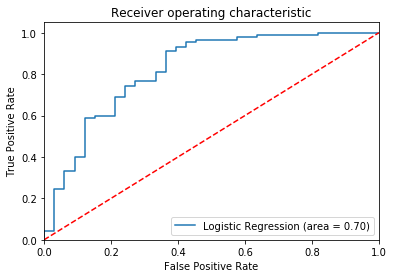

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, test_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [64]:
loan_test_id=loan_test['Loan_ID']

In [65]:
loan_test_dum=loan_test.drop(['Loan_ID'],axis=1)

In [66]:
model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0)

In [67]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

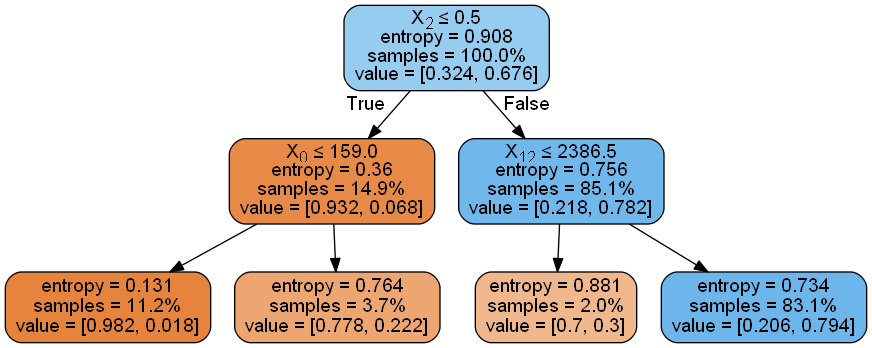

In [68]:
dot_data = StringIO()

export_graphviz(model_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#dot_data.close()

In [69]:
pred_tree_training = model_tree.predict(X_test)

In [70]:
print(confusion_matrix(pred_tree_training,y_test))
print(cohen_kappa_score(pred_tree_training,y_test))
print(accuracy_score(pred_tree_training,y_test))

[[14  3]
 [19 87]]
0.461813842482
0.821138211382


In [71]:
print (cross_val_score(model_tree,X_train,y_train,cv=10,scoring='accuracy').mean())

0.800352040816


In [72]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [73]:
loan_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [74]:
loan_test_dum=loan_test.drop(['Loan_ID'],axis=1)

In [75]:
loan_test_dum['Gender'].fillna('Male',inplace=True)

In [76]:
loan_test_dum['Dependents'].fillna('0',inplace=True)

In [77]:
loan_test_dum['Credit_History'].fillna(1,inplace=True)

In [78]:
loan_test_dum['Self_Employed'].fillna('No',inplace=True)

In [79]:
loan_test_dum.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [80]:
loan_test_dum=pd.get_dummies(loan_test_dum,drop_first=True)

In [81]:
loan_test_dum['Loan_Amount_Term'].fillna(loan_test_dum['Loan_Amount_Term'].mean(),inplace=True)

In [82]:
loan_test_dum['LoanAmount'].fillna(loan_test_dum['LoanAmount'].mean(),inplace=True)

In [84]:
test_imputed=loan_test_dum

In [85]:
test_imputed.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [86]:
test_imputed['TotalIncome']=test_imputed['ApplicantIncome']+test_imputed['CoapplicantIncome']

In [87]:
test_imputed.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [88]:
Prediction=logreg.predict(test_imputed)

In [89]:
logRegPredictionFormat = ["Y" if i == 1 else "N" for i in Prediction ]

In [90]:
pd.DataFrame({'Loan_ID':loan_test.Loan_ID,'Loan_Status':logRegPredictionFormat}).to_csv('logReg_submission2.csv',index=False)

In [91]:
prediction_tree = model_tree.predict(test_imputed)

In [92]:
decPredictionFormat = ["Y" if i == 1 else "N" for i in prediction_tree ]

In [93]:
pd.DataFrame({'Loan_ID':loan_test.Loan_ID,'Loan_Status':decPredictionFormat}).to_csv('dec_submission2.csv',index=False)